In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles (1).csv


In [ ]:
for fn in uploaded.keys():
  df = pd.read_csv(fn)

display(df.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


/tmp/ipython-input-3065445392.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette="Set2")


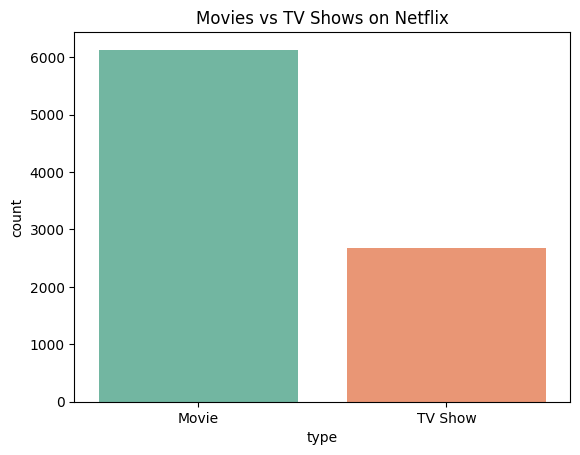

In [ ]:
sns.countplot(data=df, x='type', palette="Set2")
plt.title("Movies vs TV Shows on Netflix")
plt.show()

In [ ]:
# shape of dataset
print("shape:",df.shape)
print("\ncolumn:",df.columns)
df.info()
df.isnull().sum()

shape: (8807, 12)

column: Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
# Fill missing values with "Unknown"
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")

# Remove duplicates
df = df.drop_duplicates()

/tmp/ipython-input-3065445392.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette="Set2")


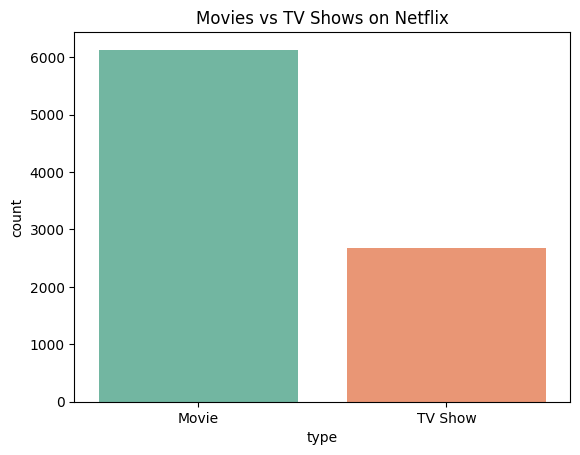

In [ ]:
sns.countplot(data=df, x='type', palette="Set2")
plt.title("Movies vs TV Shows on Netflix")
plt.show()

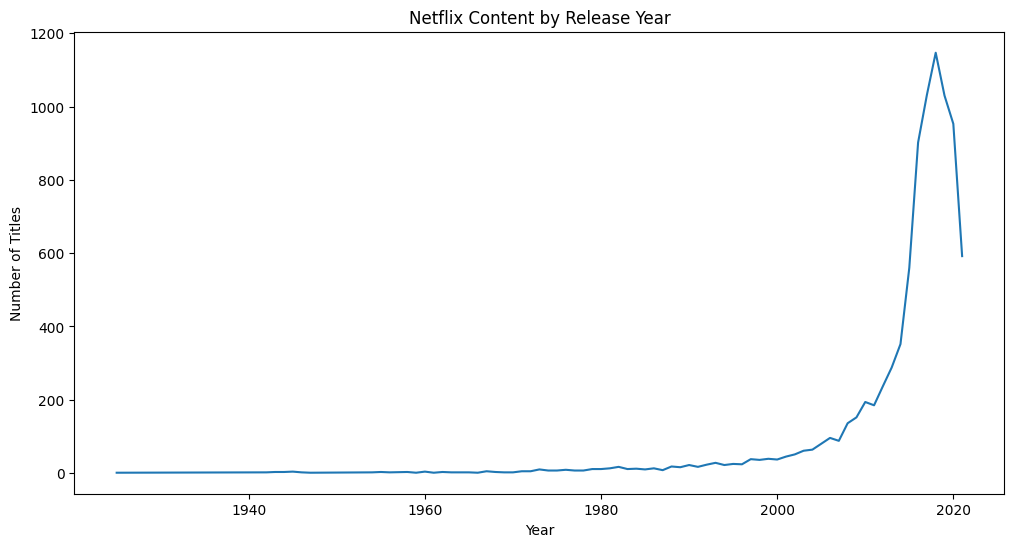

In [ ]:
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(12,6))
plt.title("Netflix Content by Release Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

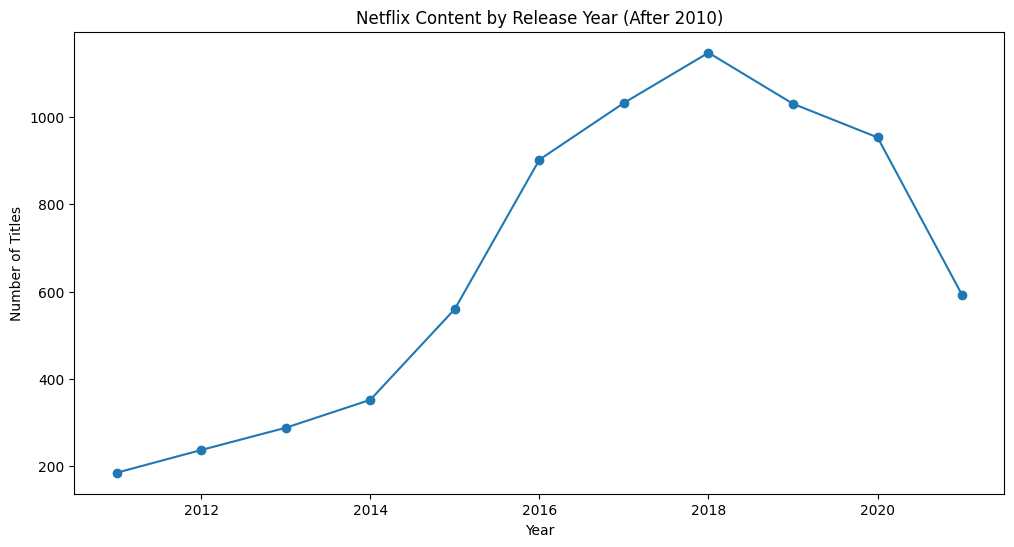

In [ ]:
# Filter for release years after 2010
after_2010 = df[df['release_year'] > 2010]

# Count by year and plot
after_2010['release_year'].value_counts().sort_index().plot(kind='line', figsize=(12,6), marker='o')
plt.title("Netflix Content by Release Year (After 2010)")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()


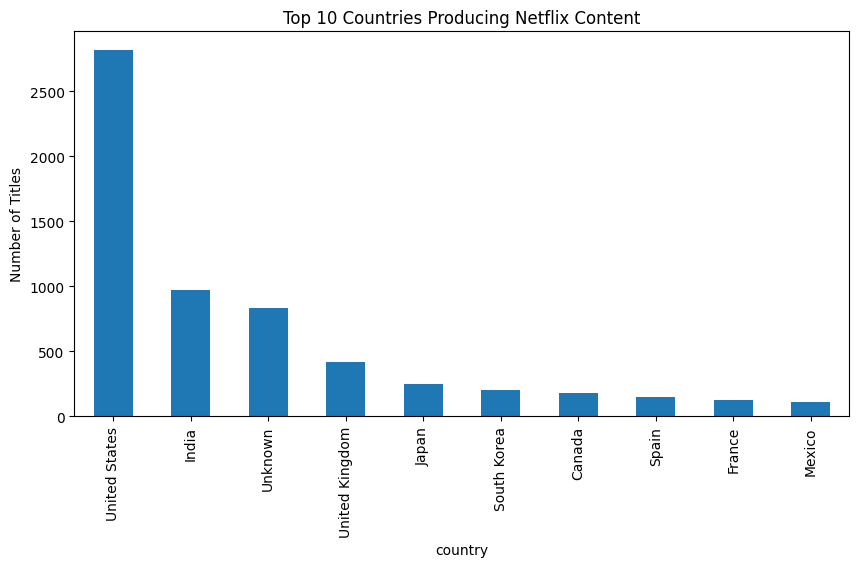

In [ ]:
df['country'].value_counts().head(10).plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Countries Producing Netflix Content")
plt.ylabel("Number of Titles")
plt.show()

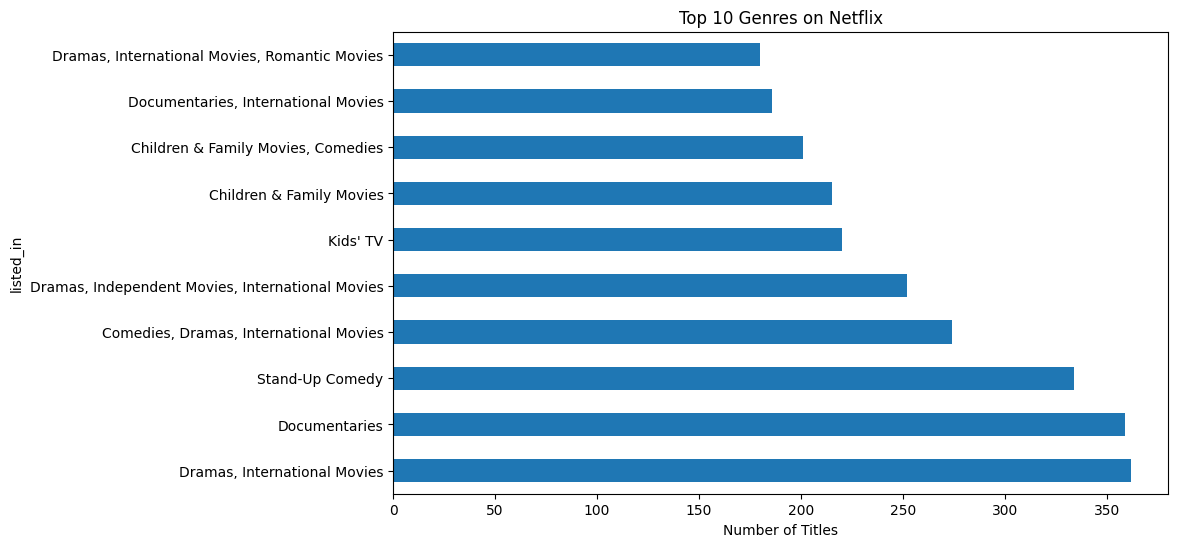

In [ ]:
df['listed_in'].value_counts().head(10).plot(kind='barh', figsize=(10,6))
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.show()

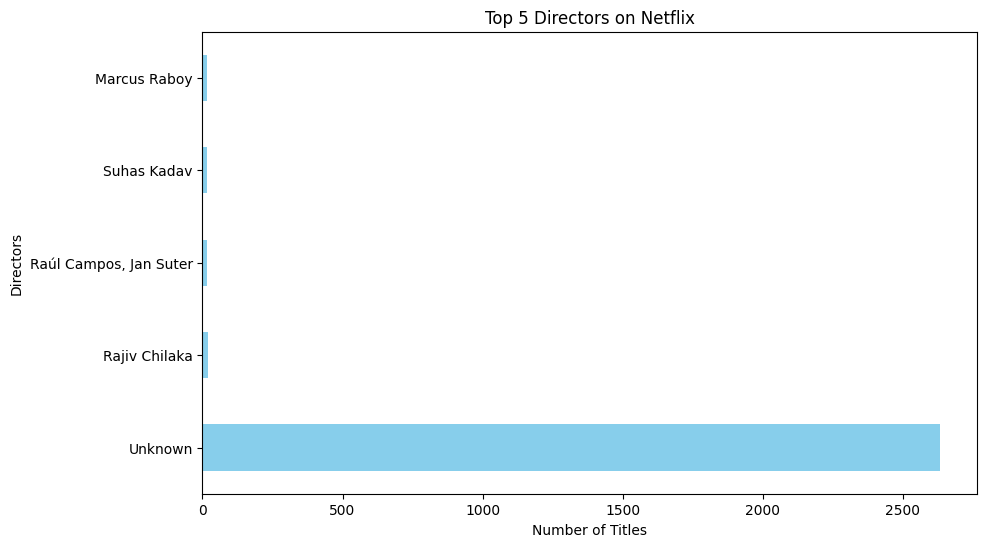

In [ ]:
# Count the top 5 directors
top_directors = df['director'].value_counts().head(5)

# Plot
top_directors.plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title("Top 5 Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Directors")
plt.show()

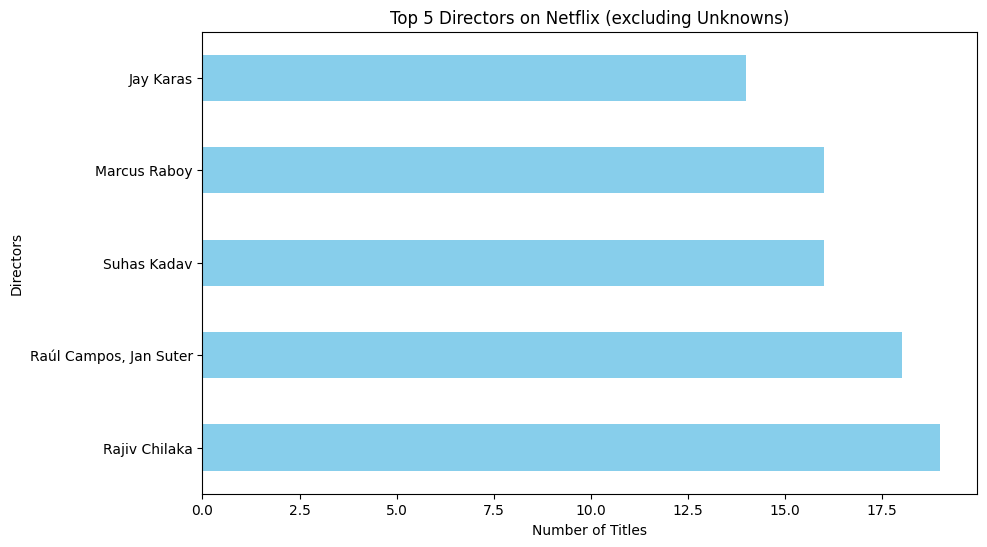

In [ ]:
# Remove NaN and 'Unknown' values
directors = df['director'].dropna()
directors = directors[directors.str.lower() != 'unknown']

# Count the top 5 directors
top_directors = directors.value_counts().head(5)

# Plot
top_directors.plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title("Top 5 Directors on Netflix (excluding Unknowns)")
plt.xlabel("Number of Titles")
plt.ylabel("Directors")
plt.show()


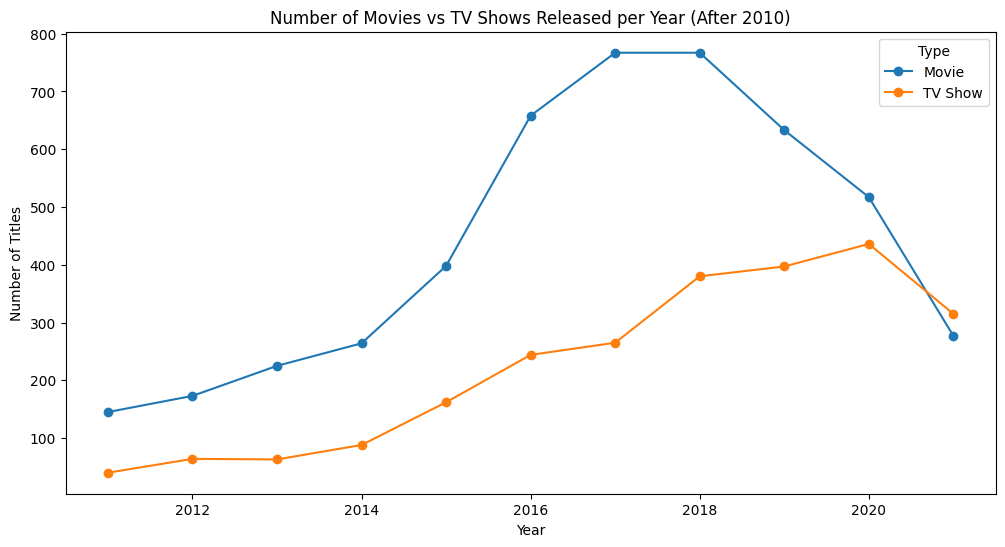

In [ ]:
# Filter for years after 2010
after_2010 = df[df['release_year'] > 2010]

# Group by year and type (Movie/TV Show)
yearly_counts = after_2010.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Plot
yearly_counts.plot(kind='line', figsize=(12,6), marker='o')
plt.title("Number of Movies vs TV Shows Released per Year (After 2010)")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend(title="Type")
plt.show()


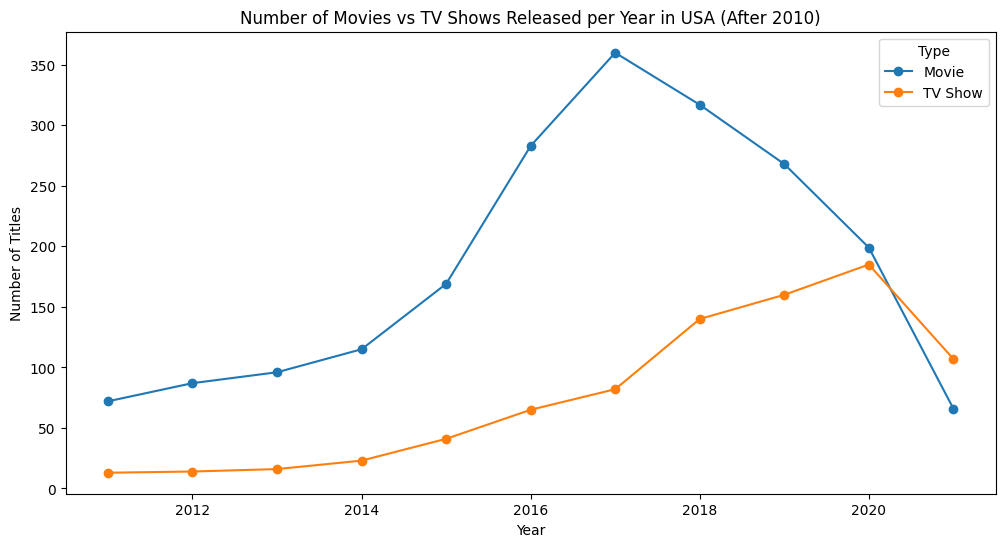

In [ ]:
# Filter for USA and after 2010
usa_after_2010 = df[(df['release_year'] > 2010) &
                    (df['country'].notna()) &
                    (df['country'].str.contains("United States"))]

# Group by year and type (Movie/TV Show)
yearly_counts_usa = usa_after_2010.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Plot
yearly_counts_usa.plot(kind='line', figsize=(12,6), marker='o')
plt.title("Number of Movies vs TV Shows Released per Year in USA (After 2010)")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend(title="Type")
plt.show()


In [ ]:
# --- Movies ---
movies = df[df['type'] == 'Movie'].copy()
# Extract numeric minutes
movies['duration_num'] = movies['duration'].str.replace(' min','').astype(float)
avg_movie_duration = movies['duration_num'].mean()

# --- TV Shows ---
tv_shows = df[df['type'] == 'TV Show'].copy()
# Extract numeric seasons
tv_shows['duration_num'] = tv_shows['duration'].str.replace(' Seasons','').str.replace(' Season','').astype(float)
avg_tvshow_duration = tv_shows['duration_num'].mean()

print("Average Movie Duration (minutes):", round(avg_movie_duration, 2))
print("Average TV Show Duration (seasons):", round(avg_tvshow_duration, 2))


Average Movie Duration (minutes): 99.58
Average TV Show Duration (seasons): 1.76


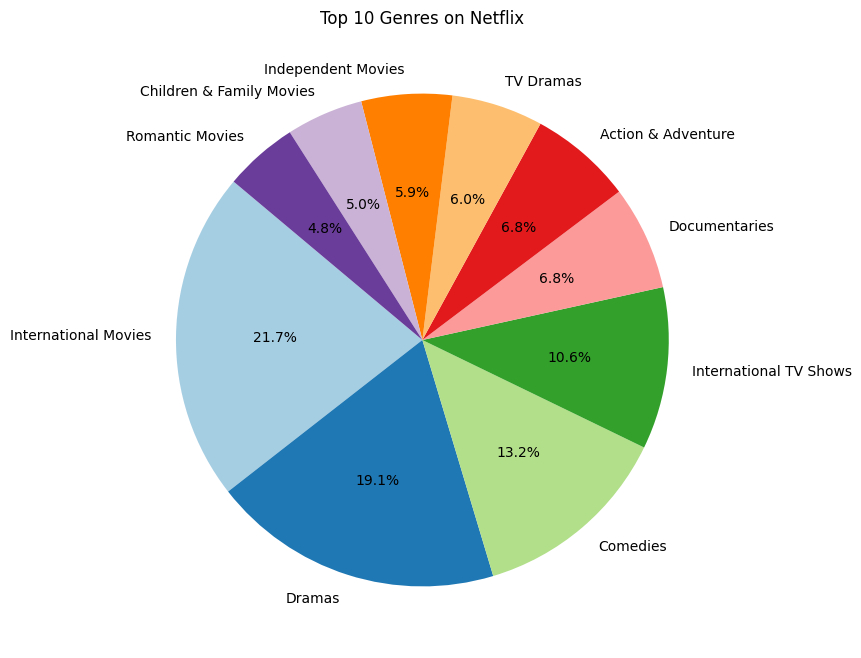

In [ ]:
# Split genres and count
genre_counts = df['listed_in'].str.split(',').explode().str.strip().value_counts()

# Plot top 10 genres as a pie chart
genre_counts.head(10).plot(kind='pie',
                           figsize=(8,8),
                           autopct='%1.1f%%',
                           startangle=140,
                           colors=plt.cm.Paired.colors)

plt.title("Top 10 Genres on Netflix")
plt.ylabel("")  # remove y-axis label
plt.show()


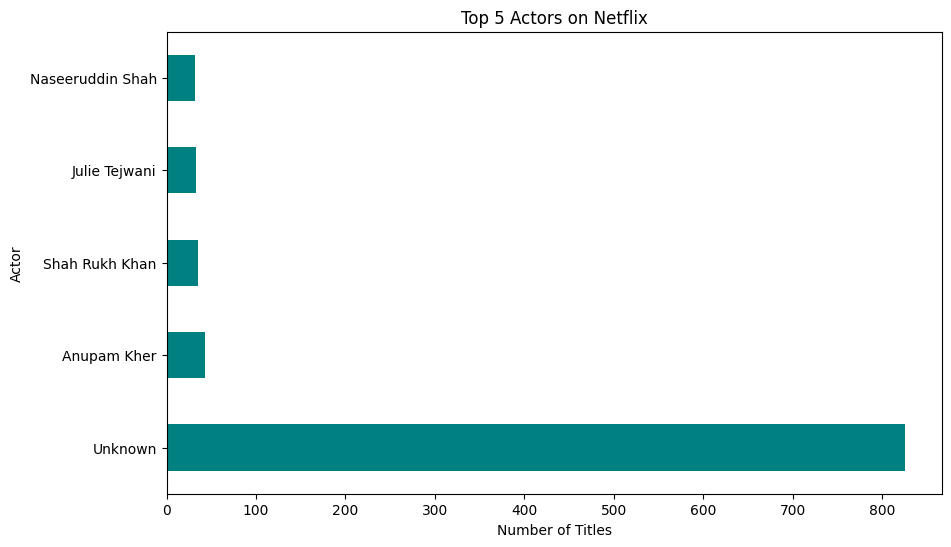

In [ ]:
top_actors = df['cast'].dropna().str.split(',').explode().str.strip().value_counts().head(5)

top_actors.plot(kind='barh', figsize=(10,6), color='teal')
plt.title("Top 5 Actors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Actor")
plt.show()


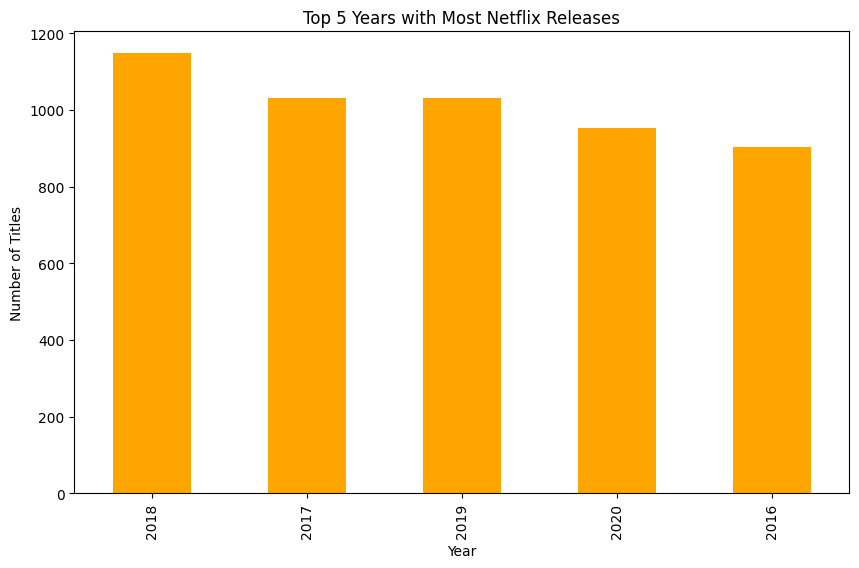

In [ ]:
top_years = df['release_year'].value_counts().head(5)

top_years.plot(kind='bar', figsize=(10,6), color='orange')
plt.title("Top 5 Years with Most Netflix Releases")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()


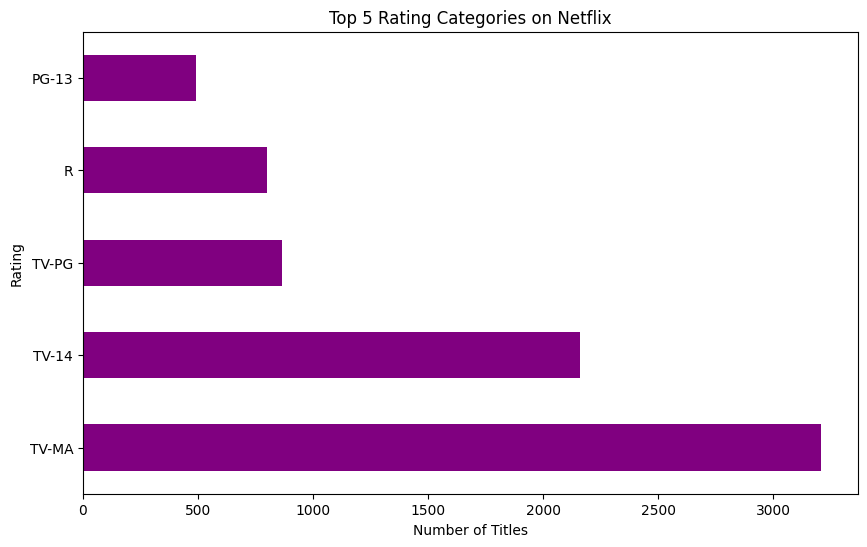

In [ ]:
top_ratings = df['rating'].value_counts().head(5)

top_ratings.plot(kind='barh', figsize=(10,6), color='purple')
plt.title("Top 5 Rating Categories on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Rating")
plt.show()


In [ ]:
movies = df[df['type'] == 'Movie'].copy()
movies['duration_num'] = movies['duration'].str.replace(' min','').astype(float)

top_longest_movies = movies.nlargest(5, 'duration_num')[['title','duration_num']]
print(top_longest_movies)


                            title  duration_num
4253   Black Mirror: Bandersnatch         312.0
717   Headspace: Unwind Your Mind         273.0
2491       The School of Mischief         253.0
2487               No Longer kids         237.0
2484           Lock Your Girls In         233.0


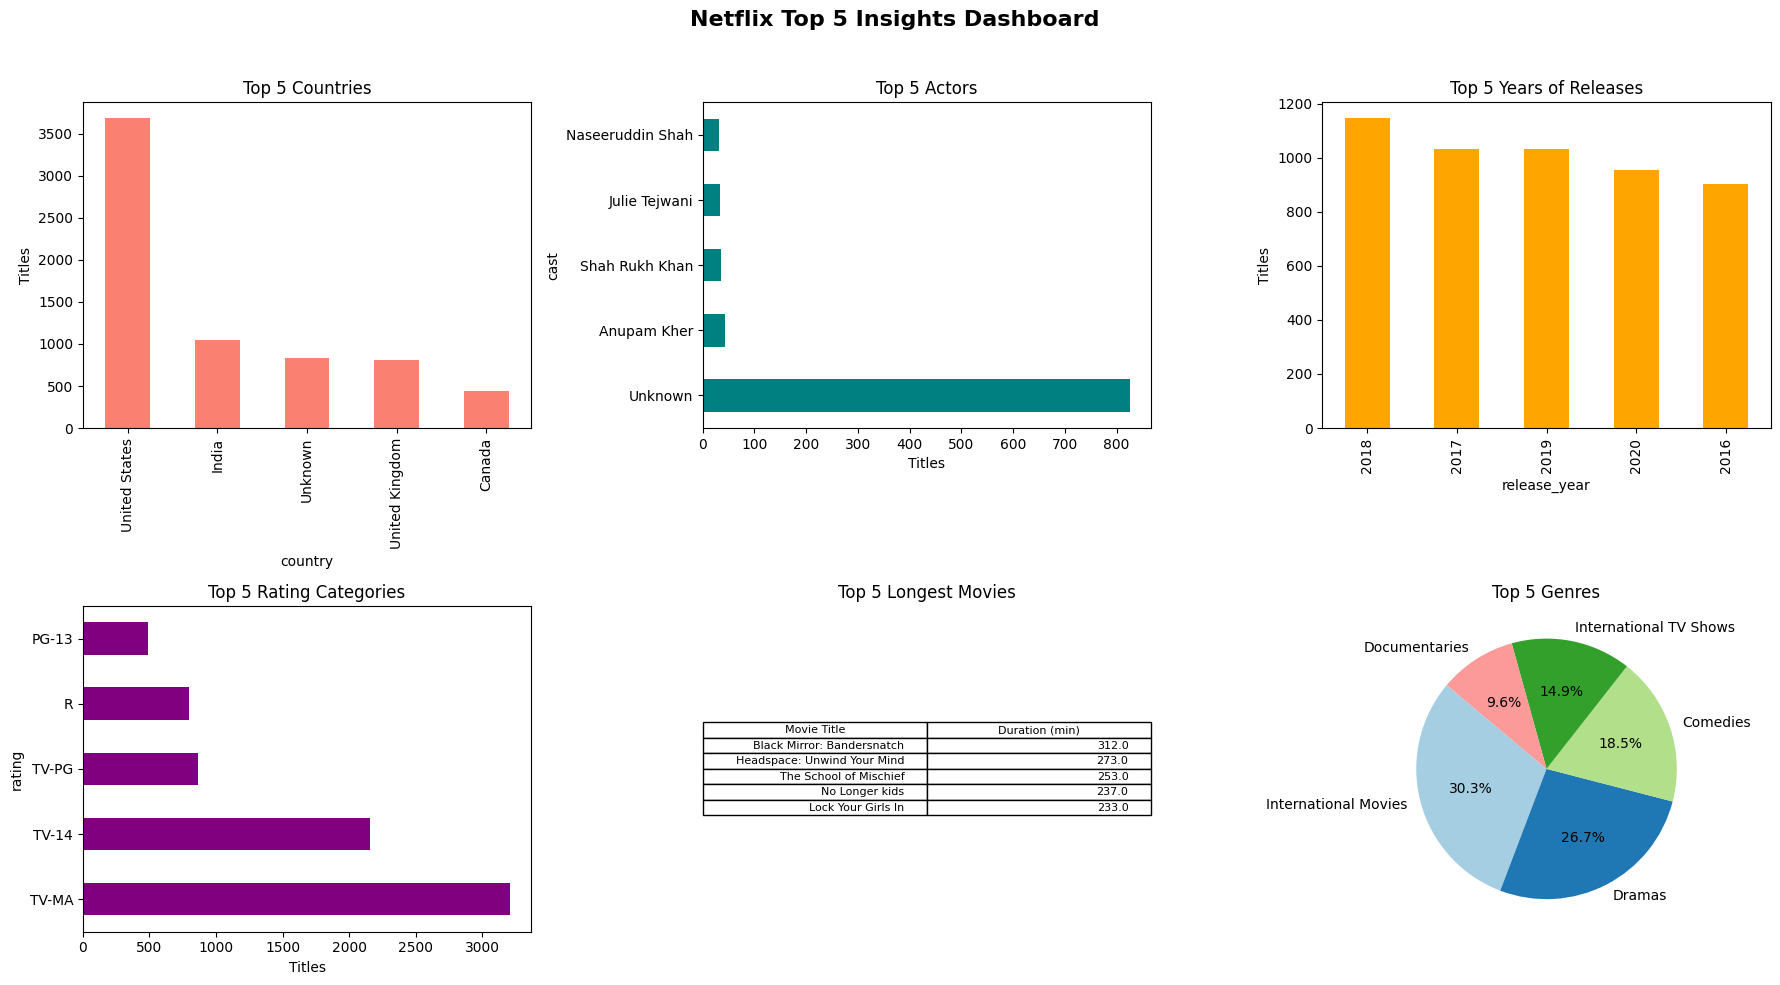

In [ ]:
import matplotlib.pyplot as plt

# --- Data Prep ---

# Top 5 countries
top_countries = df['country'].dropna().str.split(',').explode().str.strip().value_counts().head(5)

# Top 5 actors
top_actors = df['cast'].dropna().str.split(',').explode().str.strip().value_counts().head(5)

# Top 5 years
top_years = df['release_year'].value_counts().head(5)

# Top 5 rating categories
top_ratings = df['rating'].value_counts().head(5)

# Top 5 longest movies
movies = df[df['type'] == 'Movie'].copy()
movies['duration_num'] = movies['duration'].str.replace(' min','').astype(float)
top_longest_movies = movies.nlargest(5, 'duration_num')[['title','duration_num']]

# Top 5 genres
top_genres = df['listed_in'].str.split(',').explode().str.strip().value_counts().head(5)

# --- Plotting ---
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Netflix Top 5 Insights Dashboard", fontsize=16, fontweight='bold')

# 1. Top Countries
top_countries.plot(kind='bar', ax=axes[0,0], color='salmon')
axes[0,0].set_title("Top 5 Countries")
axes[0,0].set_ylabel("Titles")

# 2. Top Actors
top_actors.plot(kind='barh', ax=axes[0,1], color='teal')
axes[0,1].set_title("Top 5 Actors")
axes[0,1].set_xlabel("Titles")

# 3. Top Release Years
top_years.plot(kind='bar', ax=axes[0,2], color='orange')
axes[0,2].set_title("Top 5 Years of Releases")
axes[0,2].set_ylabel("Titles")

# 4. Top Rating Categories
top_ratings.plot(kind='barh', ax=axes[1,0], color='purple')
axes[1,0].set_title("Top 5 Rating Categories")
axes[1,0].set_xlabel("Titles")

# 5. Longest Movies (table)
axes[1,1].axis('off')
table_data = top_longest_movies.values
col_labels = ['Movie Title', 'Duration (min)']
axes[1,1].table(cellText=table_data, colLabels=col_labels, loc='center')
axes[1,1].set_title("Top 5 Longest Movies")

# 6. Top Genres (pie)
top_genres.plot(kind='pie', autopct='%1.1f%%', ax=axes[1,2], startangle=140, colors=plt.cm.Paired.colors)
axes[1,2].set_ylabel("")
axes[1,2].set_title("Top 5 Genres")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for title
plt.show()


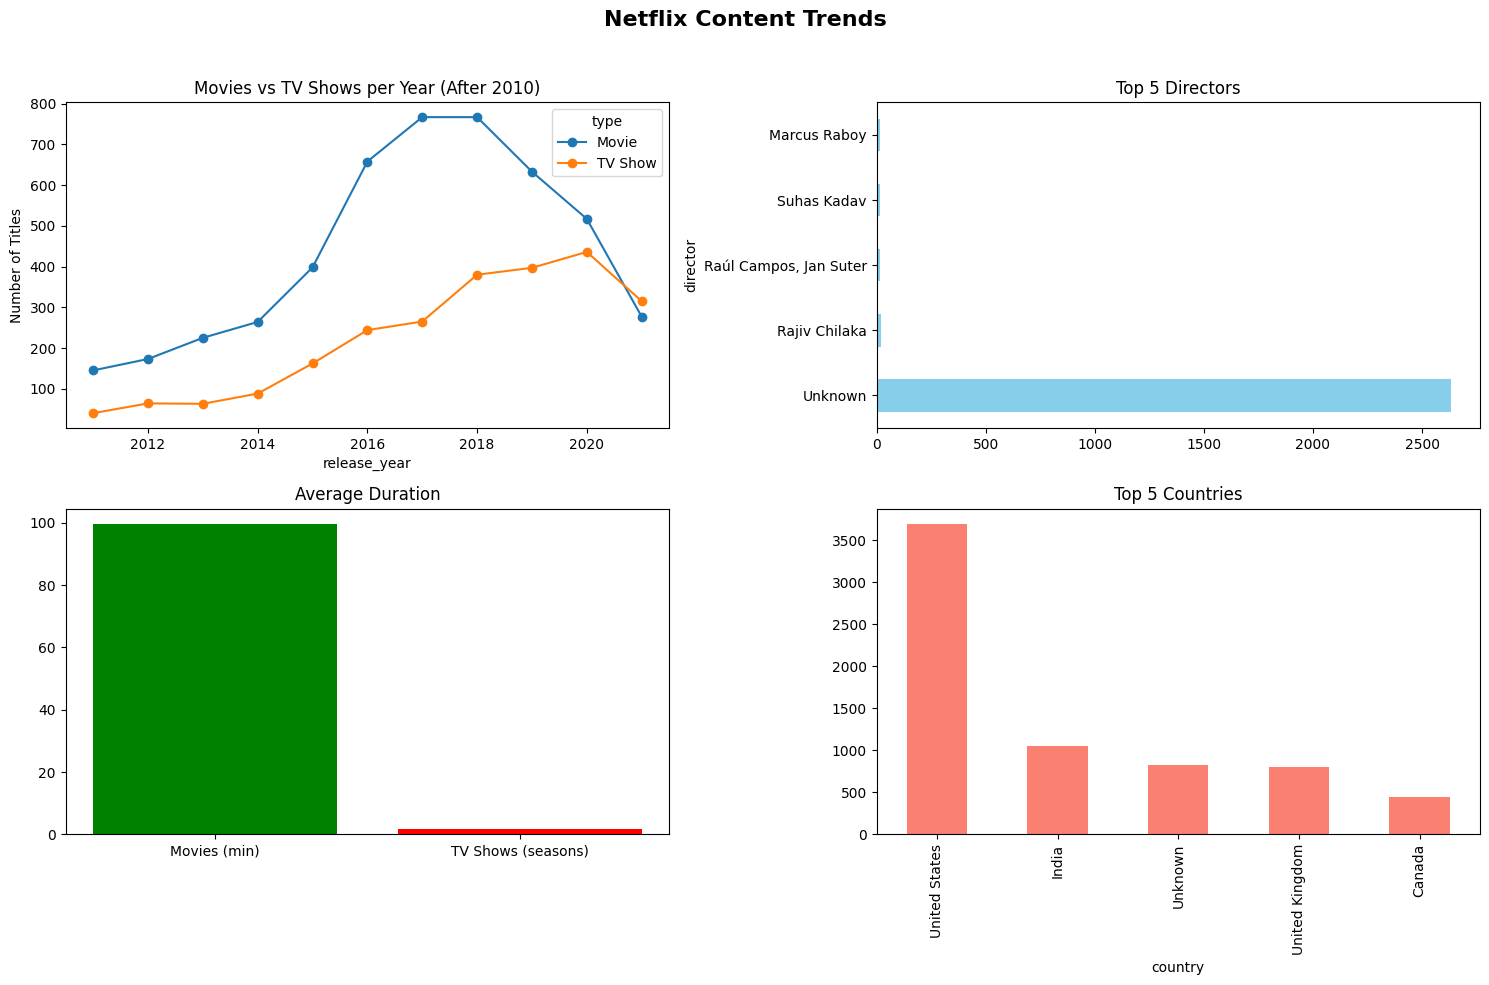

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle("Netflix Content Trends", fontsize=16, fontweight='bold')

# 1. Movies vs TV Shows per year (after 2010)
after_2010 = df[df['release_year'] > 2010]
yearly_counts = after_2010.groupby(['release_year', 'type']).size().unstack(fill_value=0)
yearly_counts.plot(ax=axes[0,0], marker='o')
axes[0,0].set_title("Movies vs TV Shows per Year (After 2010)")
axes[0,0].set_ylabel("Number of Titles")

# 2. Top 5 Directors
top_directors = df['director'].dropna().value_counts().head(5)
top_directors.plot(kind='barh', ax=axes[0,1], color='skyblue')
axes[0,1].set_title("Top 5 Directors")

# 3. Average Duration (Movies vs TV Shows)
movies = df[df['type']=='Movie'].copy()
movies['duration_num'] = movies['duration'].str.replace(' min','').astype(float)

tv_shows = df[df['type']=='TV Show'].copy()
tv_shows['duration_num'] = tv_shows['duration'].str.replace(' Seasons','').str.replace(' Season','').astype(float)

avg_durations = {
    'Movies (min)': movies['duration_num'].mean(),
    'TV Shows (seasons)': tv_shows['duration_num'].mean()
}
axes[1,0].bar(avg_durations.keys(), avg_durations.values(), color=['green','red'])
axes[1,0].set_title("Average Duration")

# 4. Top 5 Countries
top_countries = df['country'].dropna().str.split(',').explode().str.strip().value_counts().head(5)
top_countries.plot(kind='bar', ax=axes[1,1], color='salmon')
axes[1,1].set_title("Top 5 Countries")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


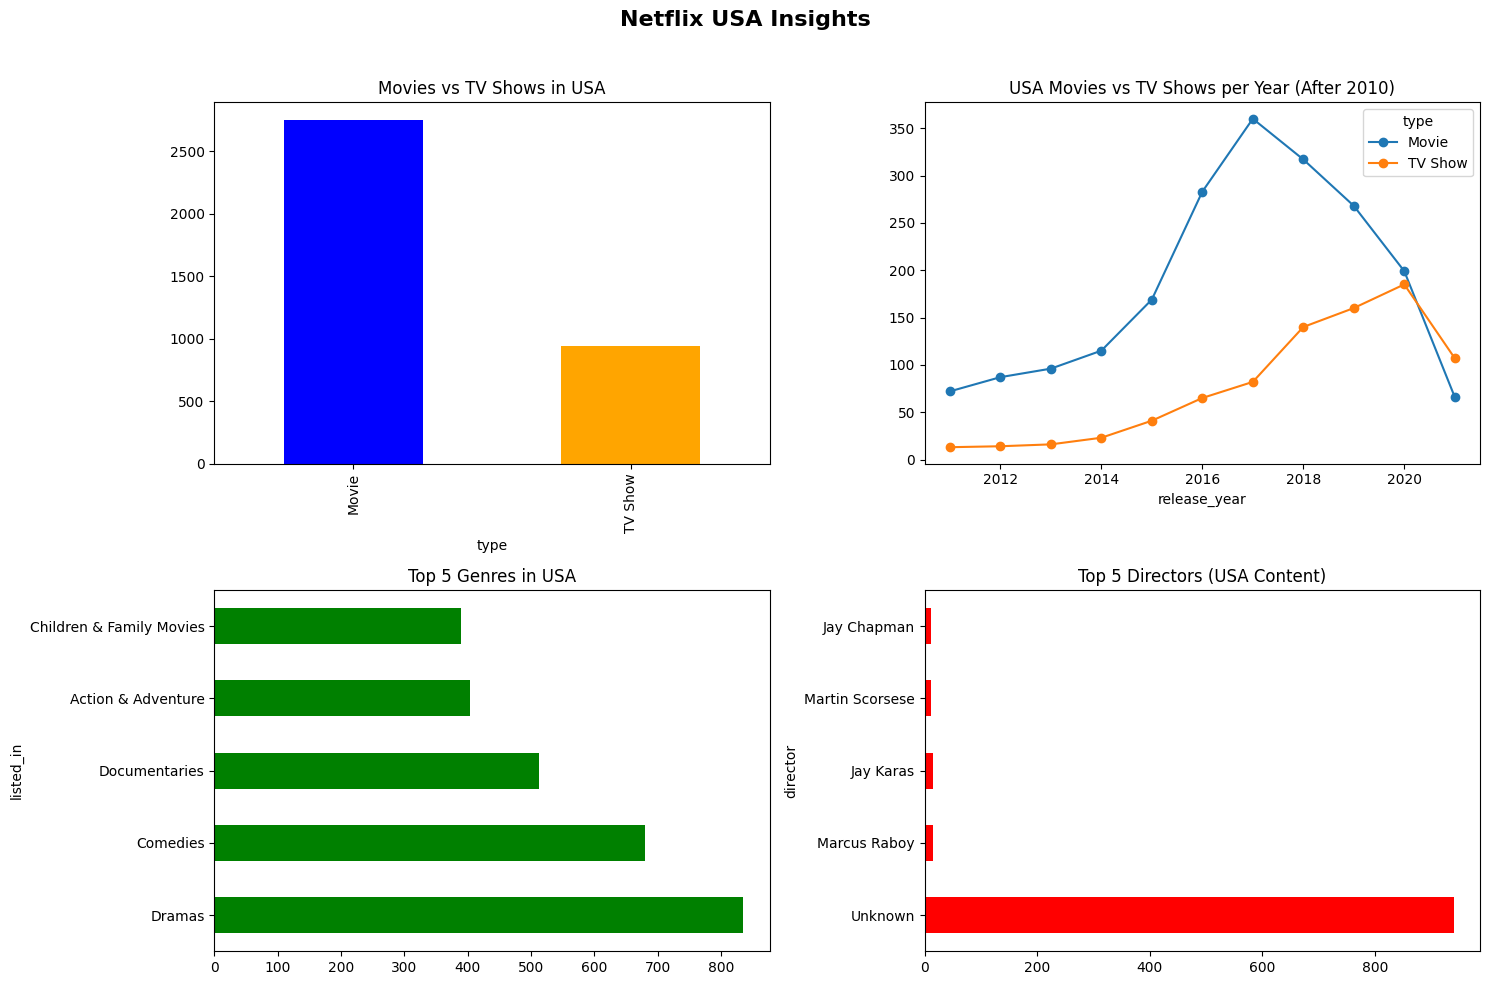

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle("Netflix USA Insights", fontsize=16, fontweight='bold')

# Filter USA
usa_df = df[(df['country'].notna()) & (df['country'].str.contains("United States"))]

# 1. Movies vs TV Shows in USA
usa_df['type'].value_counts().plot(kind='bar', ax=axes[0,0], color=['blue','orange'])
axes[0,0].set_title("Movies vs TV Shows in USA")

# 2. USA Releases after 2010 (trend)
usa_after_2010 = usa_df[usa_df['release_year'] > 2010]
usa_yearly = usa_after_2010.groupby(['release_year','type']).size().unstack(fill_value=0)
usa_yearly.plot(ax=axes[0,1], marker='o')
axes[0,1].set_title("USA Movies vs TV Shows per Year (After 2010)")

# 3. Top 5 Genres in USA
usa_genres = usa_df['listed_in'].str.split(',').explode().str.strip().value_counts().head(5)
usa_genres.plot(kind='barh', ax=axes[1,0], color='green')
axes[1,0].set_title("Top 5 Genres in USA")

# 4. Top 5 Directors from USA content
usa_directors = usa_df['director'].dropna().value_counts().head(5)
usa_directors.plot(kind='barh', ax=axes[1,1], color='red')
axes[1,1].set_title("Top 5 Directors (USA Content)")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


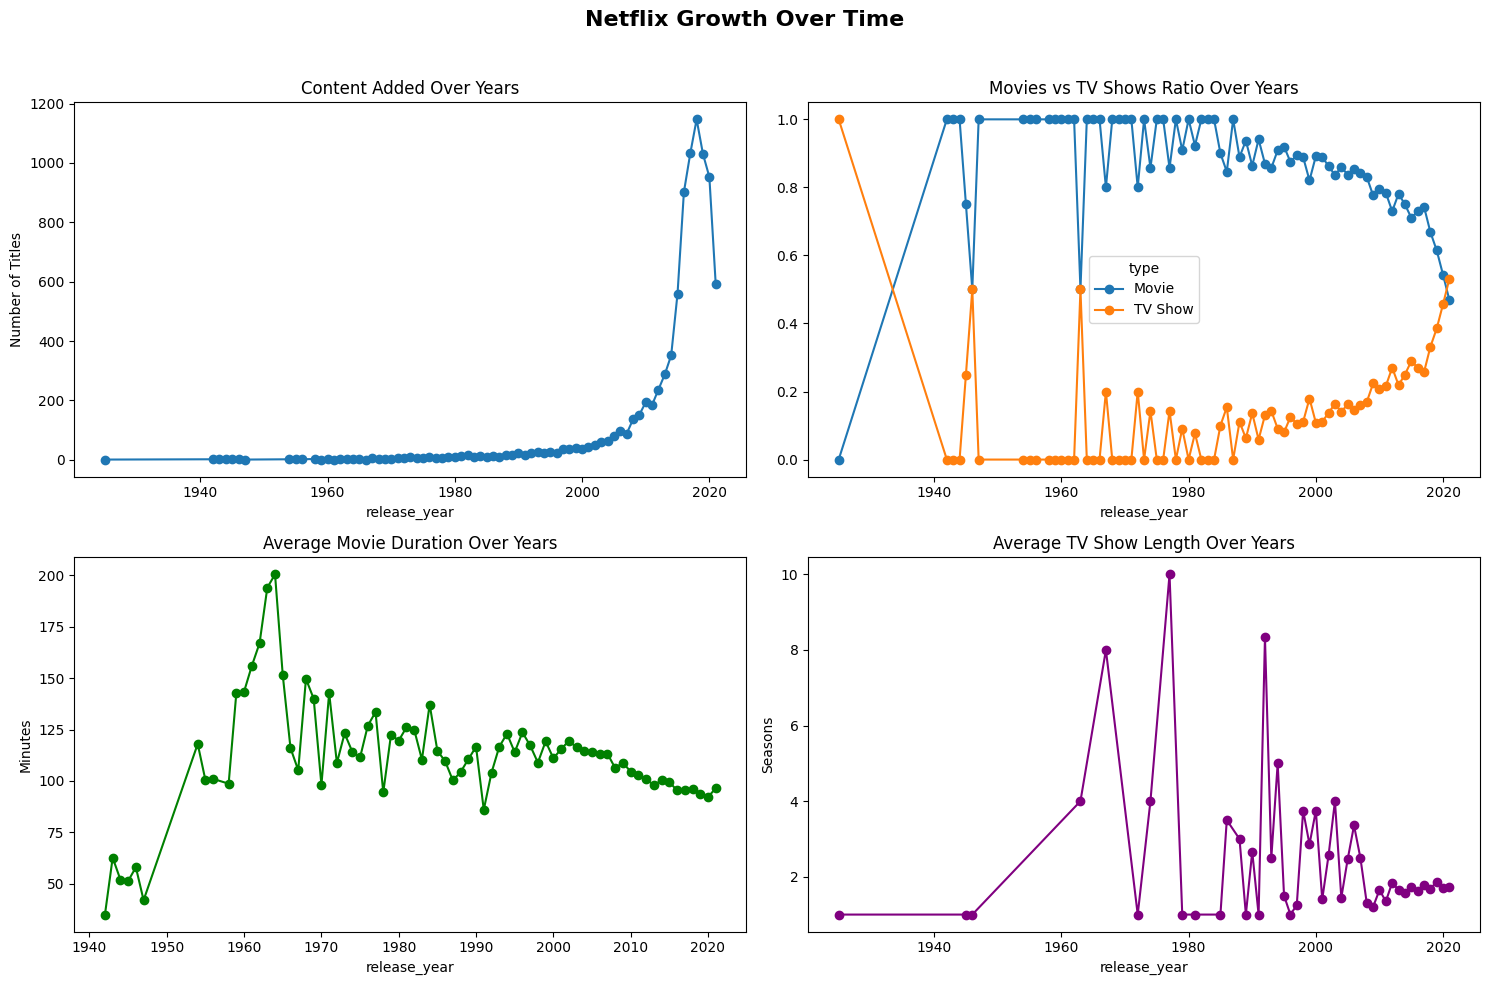

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle("Netflix Growth Over Time", fontsize=16, fontweight='bold')

# 1. Content growth trend
df['release_year'].value_counts().sort_index().plot(ax=axes[0,0], kind='line', marker='o')
axes[0,0].set_title("Content Added Over Years")
axes[0,0].set_ylabel("Number of Titles")

# 2. Movies vs TV Shows ratio over time
yearly_ratio = df.groupby(['release_year','type']).size().unstack(fill_value=0)
(yearly_ratio.div(yearly_ratio.sum(axis=1), axis=0)).plot(ax=axes[0,1], kind='line', marker='o')
axes[0,1].set_title("Movies vs TV Shows Ratio Over Years")

# 3. Average movie duration over years
movies = df[df['type']=="Movie"].copy()
movies['duration_num'] = movies['duration'].str.replace(' min','').astype(float)
movies.groupby('release_year')['duration_num'].mean().plot(ax=axes[1,0], kind='line', marker='o', color='green')
axes[1,0].set_title("Average Movie Duration Over Years")
axes[1,0].set_ylabel("Minutes")

# 4. Average TV show length (seasons) over years
tv = df[df['type']=="TV Show"].copy()
tv['duration_num'] = tv['duration'].str.replace(' Seasons','').str.replace(' Season','').astype(float)
tv.groupby('release_year')['duration_num'].mean().plot(ax=axes[1,1], kind='line', marker='o', color='purple')
axes[1,1].set_title("Average TV Show Length Over Years")
axes[1,1].set_ylabel("Seasons")

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


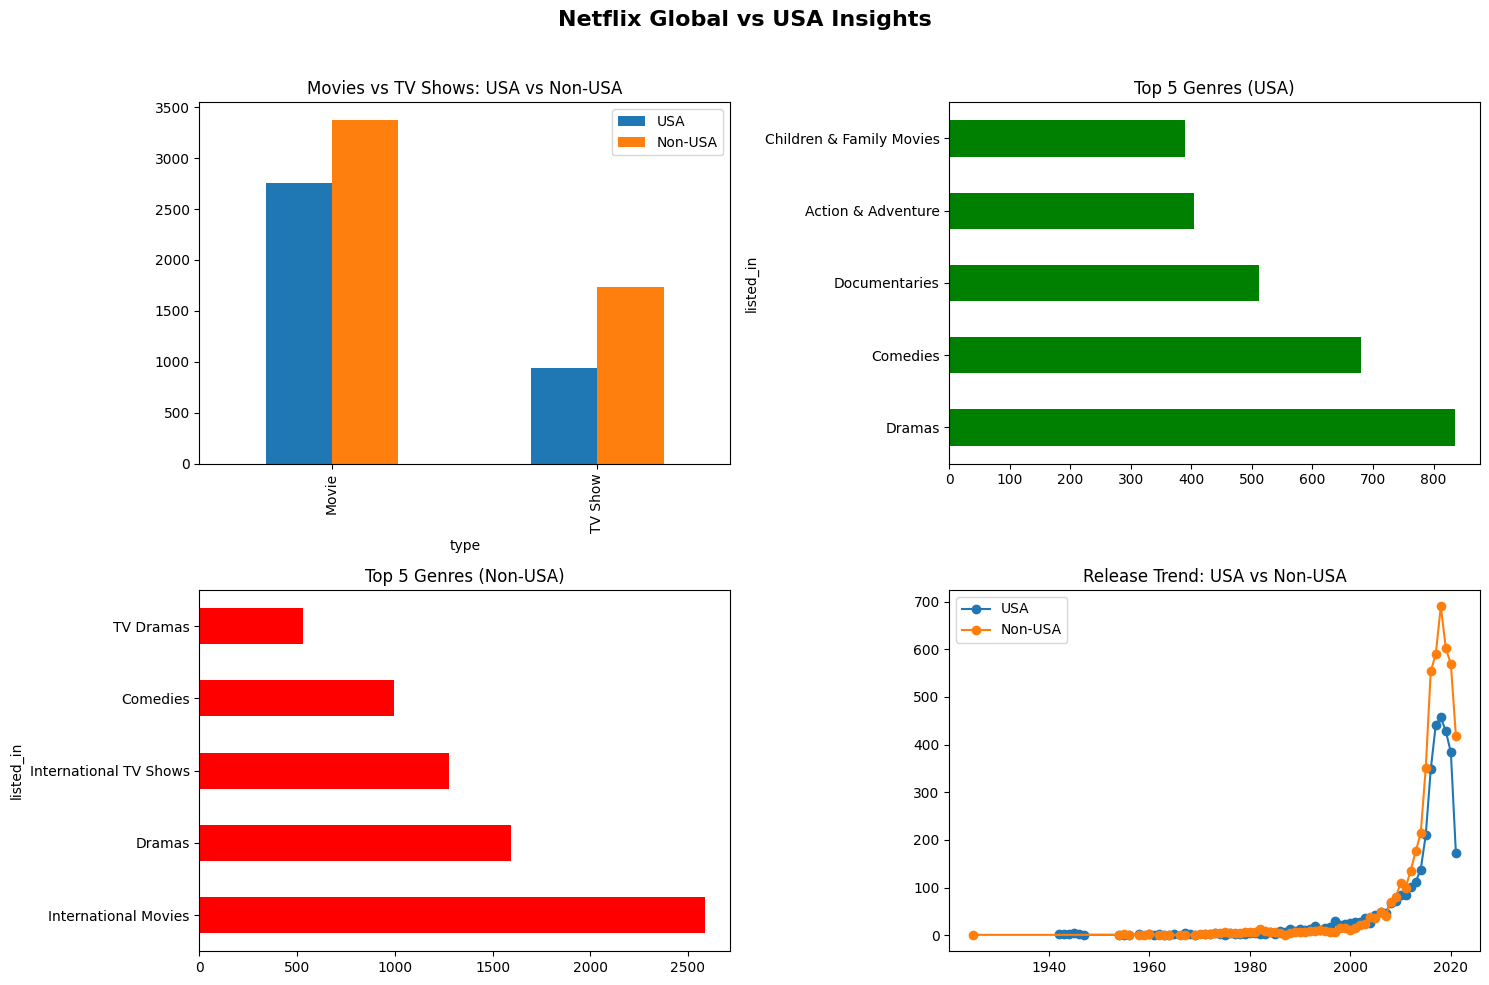

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle("Netflix Global vs USA Insights", fontsize=16, fontweight='bold')

# Filter USA & Non-USA
usa_df = df[(df['country'].notna()) & (df['country'].str.contains("United States"))]
non_usa_df = df[(df['country'].notna()) & (~df['country'].str.contains("United States"))]

# 1. Content type comparison
pd.DataFrame({
    'USA': usa_df['type'].value_counts(),
    'Non-USA': non_usa_df['type'].value_counts()
}).plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title("Movies vs TV Shows: USA vs Non-USA")

# 2. Top genres in USA
usa_df['listed_in'].str.split(',').explode().str.strip().value_counts().head(5).plot(kind='barh', ax=axes[0,1], color='green')
axes[0,1].set_title("Top 5 Genres (USA)")

# 3. Top genres outside USA
non_usa_df['listed_in'].str.split(',').explode().str.strip().value_counts().head(5).plot(kind='barh', ax=axes[1,0], color='red')
axes[1,0].set_title("Top 5 Genres (Non-USA)")

# 4. Release year trend comparison
usa_trend = usa_df['release_year'].value_counts().sort_index()
non_usa_trend = non_usa_df['release_year'].value_counts().sort_index()
axes[1,1].plot(usa_trend.index, usa_trend.values, label="USA", marker='o')
axes[1,1].plot(non_usa_trend.index, non_usa_trend.values, label="Non-USA", marker='o')
axes[1,1].set_title("Release Trend: USA vs Non-USA")
axes[1,1].legend()

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()
